Clustering: Hierarchical Dataset : 
50_Startups.csv 
Apply Data pre-processing (Label Encoding , Data Transformation….) 
techniques if necessary. 
Apply Hierarchical clustering algorithms (based on PROFIT column) 
to find the group of start-ups. 

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv('50_Startups.csv')

# Preview the dataset
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Check for missing values
print(data.isnull().sum())
# Drop or fill missing values if necessary
data = data.dropna()


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [6]:
# Standardize the 'PROFIT' column
scaler = StandardScaler()
data['PROFIT_scaled'] = scaler.fit_transform(data[['Profit']])


In [7]:
# Prepare the data for clustering
X = data[['PROFIT_scaled']]

# Perform Hierarchical Clustering
Z = linkage(X, method='ward')


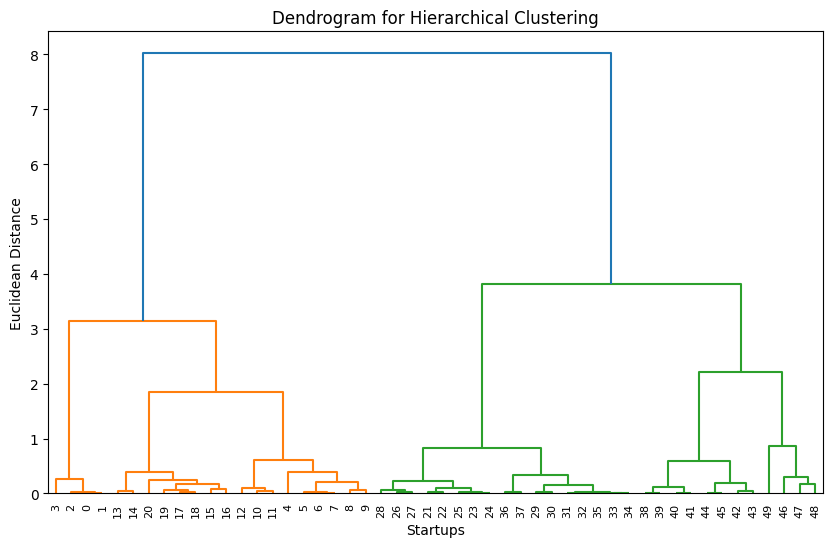

In [8]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Startups")
plt.ylabel("Euclidean Distance")
plt.show()


In [11]:
from sklearn.cluster import AgglomerativeClustering

# Fit Agglomerative Clustering with the chosen number of clusters
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['cluster'] = cluster.fit_predict(X)


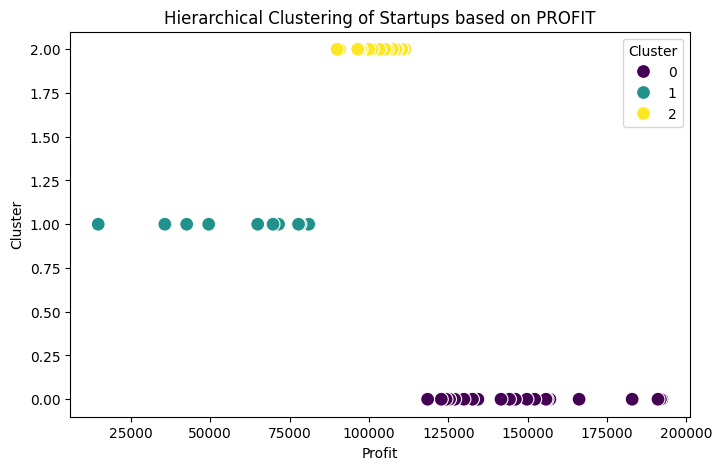

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Profit', y='cluster', hue='cluster', palette='viridis', s=100)
plt.title("Hierarchical Clustering of Startups based on PROFIT")
plt.xlabel("Profit")
plt.ylabel("Cluster")
plt.legend(title="Cluster")
plt.show()
